Jeffery Smith

Gradient Boosting Models

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_auc_score, RocCurveDisplay

Accuracy: 0.91

Confusion matrix:
 [[712  10]
 [ 65  63]]

Classification report:
               precision    recall  f1-score   support

           0      0.916     0.986     0.950       722
           1      0.863     0.492     0.627       128

    accuracy                          0.912       850
   macro avg      0.890     0.739     0.788       850
weighted avg      0.908     0.912     0.901       850



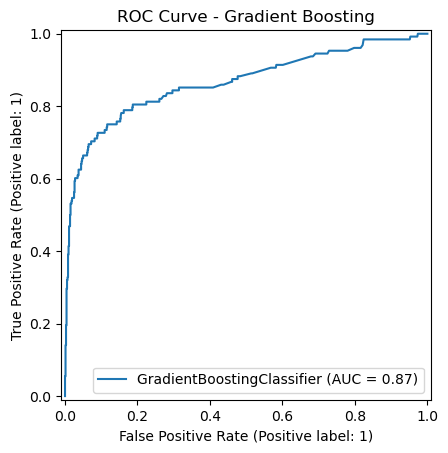

AUC: 0.87
Gradient Boosting Classifier Accuracy: 0.91


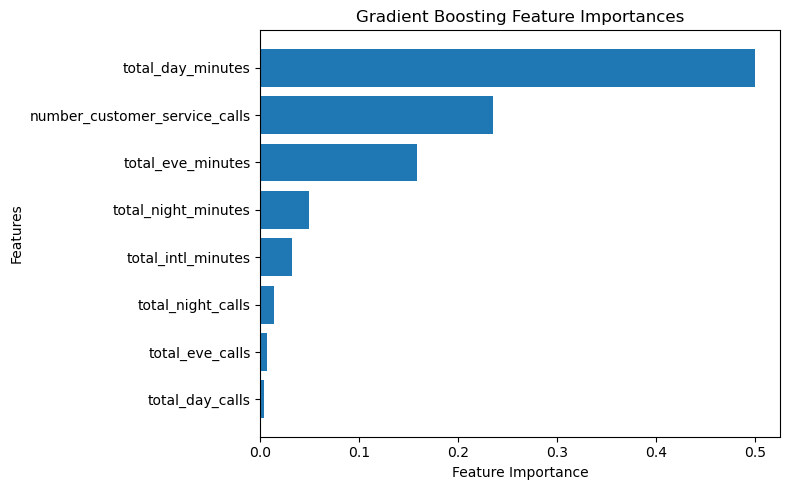

In [7]:
# Gradient Boosting Classifier - churn-encoded

# Load data
train_df = pd.read_csv('train.csv')

# churn_encoded column syntax refactored by ChatGPT 
# Encode churn as binary (robust to stray capitalization/whitespace)
train_df["churn_encoded"] = (train_df["churn"].astype(str).str.strip().str.lower().map({"no": 0, "yes": 1}))


# Select features (predictors) and target
X_features = [
    'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
    'total_intl_minutes', 'total_day_calls', 'total_eve_calls',
    'total_night_calls', 'number_customer_service_calls']
y_encoded = 'churn_encoded'


# Define the feature and target variables
X = train_df[X_features]
y = train_df[y_encoded]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Create and fit the GradientBoostingClassifier model
gb_classifier = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.005, max_depth=3, random_state=40)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_class = gb_classifier.predict(X_test)
y_prob_class = gb_classifier.predict_proba(X_test)[:, 1]


print(f"Accuracy: {accuracy_score(y_test, y_pred_class):.2f}")
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_class))
print("\nClassification report:\n", classification_report(y_test, y_pred_class, digits=3))

# Plot ROC Curve
RocCurveDisplay.from_estimator(gb_classifier, X_test, y_test)
plt.title("ROC Curve - Gradient Boosting")
plt.show()

auc = roc_auc_score(y_test, y_prob_class)
print(f"AUC: {auc:.2f}")

# Evaluate the classifier model
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Gradient Boosting Classifier Accuracy: {accuracy:.2f}")

importances = pd.Series(gb_classifier.feature_importances_, index=X_train.columns).sort_values()
plt.figure(figsize=(8, 5))
plt.barh(importances.index, importances.values)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Gradient Boosting Feature Importances")
plt.tight_layout()
plt.show()

In [11]:
### Gradient Boosting Regressor using 'total_day_minutes' as target

# Load data
train_df = pd.read_csv('train.csv')

# Encode churn as binary / preprocess to lowercase
train_df["churn_encoded"] = (train_df["churn"].astype(str).str.strip().str.lower().map({"no": 0, "yes": 1}))

X_features = [
    'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
    'total_intl_minutes', 'total_day_calls', 'total_eve_calls',
    'total_night_calls', 'number_customer_service_calls']

X_reg = train_df[X_features]
y_reg = train_df['total_day_minutes']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=20)

# Fit the GradientBoostingRegressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.005, max_depth=3, random_state=20)
gb_reg.fit(X_train_reg, y_train_reg)

# Make predictions and evaluate
y_pred_reg = gb_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Gradient Boosting Regressor Mean Squared Error: {mse:.2f}")

# Get feature importances from the trained classifier
feature_importances = gb_reg.feature_importances_

# DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(importance_df)

Gradient Boosting Regressor Mean Squared Error: 1208.65
Feature Importance:
                         Feature  Importance
0              total_day_minutes         1.0
1              total_eve_minutes         0.0
2            total_night_minutes         0.0
3             total_intl_minutes         0.0
4                total_day_calls         0.0
5                total_eve_calls         0.0
6              total_night_calls         0.0
7  number_customer_service_calls         0.0
